<a href="https://colab.research.google.com/github/nyamskamau/Housing-Price-Prediction-Dataset-Week-7/blob/main/Independent_Project_Week_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Independent Project - Week 7** 

> **1. Defining the Question**
* Hass Consulting Company , a real estste company , would like to investigate the factors that affect housing prices using the given information on real estate properties that was collected over some months.
* The company would then like to predict the sale price of Houses upon being provided with the predictor variables.


> **2. Metric for Success**
* The metric for success for this analysis for the company  would be to determine the exact features that influence the price of a house and to predict the sale prices.
* Ideally as a researcher while building my model, the metric of success will be measured by the Coefficient of Determination.
I would like to obtain an r2_score of 0.80 or above while evaluating the performance of my model.

> **3. Experimental Design Taken**
* This first step of this analysis will be loading the dataset , the appropriate libraries and  then taking the necessary steps to clean the data.
* Next I will carry out Univariate and Bivariate data analysis while dealing with the outliers found within my dataset,
* Finally I will build several models:
    * Multiple Linear Regression
    * Quantile Regression
    * Ridge Regression
    * Lasso Regression
    * Elastic Net Regression
* And evaluate their performance on the dataset at hand and then provide  observations and recommendations on the suitability of each of the tested models on their appropriateness of solving the given problem. 

> **4. Exploring the Dataset**
* The Dataset given has 20 columns , with the dependent variable being the Price of the house and the other variables being the features.
* The descriptions for these columns is provided below.

> **5. The appropriateness of the available data to answer the given question**
* Given the objectives of my analysis the Data available is appropriate.

## **1**. **Loading The Data**

### **1.1.Loading the Dataset and the Appropriate Libraries**

> * The first step I undertook in this analysis was loading the dataset onto my notebook and importing the libraries.
* Next I previewed the dataset and obtained information on the datatypes of the columns given and gave a detailed description of all the columns given in the dataset.


In [535]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


In [536]:
df = pd.read_csv('Housedata.csv')

In [537]:
df.shape

(21613, 20)

In [538]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [539]:
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.00000,3,1.00000,1180,5650,1.00000,0,0,3,7,1180,0,1955,0,98178,47.51120,-122.25700,1340,5650
1,6414100192,538000.00000,3,2.25000,2570,7242,2.00000,0,0,3,7,2170,400,1951,1991,98125,47.72100,-122.31900,1690,7639
2,5631500400,180000.00000,2,1.00000,770,10000,1.00000,0,0,3,6,770,0,1933,0,98028,47.73790,-122.23300,2720,8062
3,2487200875,604000.00000,4,3.00000,1960,5000,1.00000,0,0,5,7,1050,910,1965,0,98136,47.52080,-122.39300,1360,5000
4,1954400510,510000.00000,3,2.00000,1680,8080,1.00000,0,0,3,8,1680,0,1987,0,98074,47.61680,-122.04500,1800,7503


In [540]:
df.tail()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.00000,3,2.50000,1530,1131,3.00000,0,0,3,8,1530,0,2009,0,98103,47.69930,-122.34600,1530,1509
21609,6600060120,400000.00000,4,2.50000,2310,5813,2.00000,0,0,3,8,2310,0,2014,0,98146,47.51070,-122.36200,1830,7200
21610,1523300141,402101.00000,2,0.75000,1020,1350,2.00000,0,0,3,7,1020,0,2009,0,98144,47.59440,-122.29900,1020,2007
21611,291310100,400000.00000,3,2.50000,1600,2388,2.00000,0,0,3,8,1600,0,2004,0,98027,47.53450,-122.06900,1410,1287
21612,1523300157,325000.00000,2,0.75000,1020,1076,2.00000,0,0,3,7,1020,0,2008,0,98144,47.59410,-122.29900,1020,1357


The description for the 20 features is given below:

1. id :- It is the unique numeric number assigned to each house being sold.
2. date :- It is the date on which the house was sold out.
3. price:- It is the price of house which we have to predict so this is our target variable and aprat from it are our features.
4. bedrooms :- It determines number of bedrooms in a house.
5. bathrooms :- It determines number of bathrooms in a bedroom of a house.
6. sqft_living :- It is the measurement variable which determines the measurement of house in square foot.
7. sqft_lot : It is also the measurement variable which determines square foot of the lot.
8. floors: It determines total floors means levels of house.
9. waterfront : This feature determines whether a house has a view to waterfront 0 means no 1 means yes.
10. view : This feature determines whether a house has been viewed or not 0 means no 1 means yes.
11. condition : It determines the overall condition of a house on a scale of 1 to 5.
12. grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11.
13. sqft_above : It determines square footage of house apart from basement.
14. sqft_basement : It determines square footage of the basement of the house.
15. yr_built : It detrmines the date of building of the house.
16. yr_renovated : It detrmines year of renovation of house.
17. zipcode : It determines the zipcode of the location of the house.
18. lat : It determines the latitude of the location of the house.
19. long : It determines the longitude of the location of the house.
20. sqft_living15 : Living room area in 2015(implies-- some renovations)
21. sqft_lot15 : lotSize area in 2015(implies-- some renovations)

### **1.2.Data Cleaning**

The next step I undertook was cleaning the dataset and checking the appropriateness of the columns given in the analysis.

#### 1.2.1.Validity

>* I checked for the relevance of the columns given in the dataset in my analysis.
>* Majority of the houses had not been renovated and hence this column was also dropped.

In [541]:
df.waterfront.value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [542]:
df.yr_renovated.value_counts()

0       20699
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [543]:
df.drop(['id','yr_renovated','waterfront'],axis=1,inplace=True)

####1.2.2.Accuracy

>* Checking that the data in the columns was correct.
>* In the bedrooms column some entries were recorded as having zero bedrooms.
 

In [544]:
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [545]:
df.bathrooms.value_counts()

2.50000    5380
1.00000    3852
1.75000    3048
2.25000    2047
2.00000    1930
1.50000    1446
2.75000    1185
3.00000     753
3.50000     731
3.25000     589
3.75000     155
4.00000     136
4.50000     100
4.25000      79
0.75000      72
4.75000      23
5.00000      21
5.25000      13
0.00000      10
5.50000      10
1.25000       9
6.00000       6
0.50000       4
5.75000       4
8.00000       2
6.25000       2
6.50000       2
6.75000       2
7.50000       1
7.75000       1
Name: bathrooms, dtype: int64

#### 1.2.3.Completeness
>* I then checked whether there were any missing values in the Dataset.

In [546]:
df.isnull().sum().sum()

0

#### 1.2.4.Consistency
>* I checked for duplicated entries in the dataset.
Seeing as there were three I opted to dropped these from the dataset.

In [547]:
df.duplicated().sum()

5

In [548]:
df.drop_duplicates(inplace=True)

In [549]:
df.duplicated().sum()

0

#### 1.2.5.Uniformity.

>* Seeing as the columns were all named correctly , and of the right data type I proceeded to carry out EDA.

## **2.Exploratory Data Analysis**

###2.1.Univariate Analysis.

> The Price Variable

In [550]:
pd.options.display.float_format = '{:.5f}'.format

>* Obtaining the mean, mode ,median and range for the column

In [551]:
df['price'].describe()

count     21608.00000
mean     540192.40781
std      367399.63434
min       75000.00000
25%      321837.50000
50%      450000.00000
75%      645000.00000
max     7700000.00000
Name: price, dtype: float64

In [552]:
a=df['price'].max()
b=df['price'].min()
range = a-b
range

7625000.0

>* Plotting a boxplot and histogram for the column 

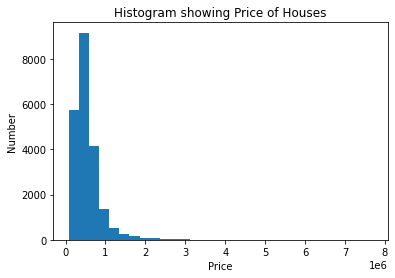

In [553]:
df1 =df['price']
plt.hist(df1, bins=30, histtype='bar', rwidth=2)

plt.xlabel('Price')
plt.ylabel('Number')
plt.title('Histogram showing Price of Houses') 
plt.show()


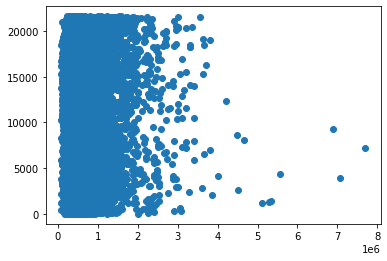

In [554]:
plt.scatter(df.price,df.index)

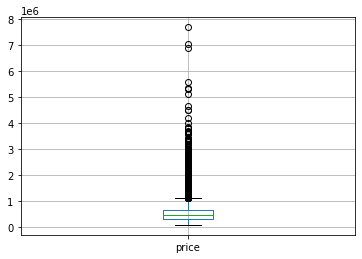

In [555]:
df.boxplot('price')

>* Checking for outliers in the column.

In [556]:
Q1 = df[['price']].quantile(0.25)
Q3 = df[['price']].quantile(0.75)
IQR = Q3 - Q1
((df[['price']]<(Q1 - 1.5*IQR))|(df[['price']]>(Q3 + 1.5 *IQR))).value_counts()

price
False    20449
True      1159
dtype: int64

>* The mean price of the houses was  540,82 while the minimum price 75,000 and the maximum price was 7,700,000.
>* The range of the variable is 7,625,000 which is very high.
>* The column also had a number of outliers which I opted not to drop here, given that they would be used in Building the models.

Grade Variable.

In [557]:
df.grade.describe()

count   21608.00000
mean        7.65665
std         1.17548
min         1.00000
25%         7.00000
50%         7.00000
75%         8.00000
max        13.00000
Name: grade, dtype: float64

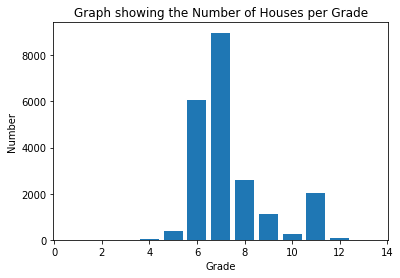

In [558]:
labels=df.grade.unique()
plt.bar(labels , df['grade'].value_counts())
plt.ylabel("Number")
plt.xlabel("Grade")
plt.title("Graph showing the Number of Houses per Grade")
plt.show()

>* Majority of the Houses were given a grade of 7 whereas these grades ranged from 1-13.

View Variable

In [559]:
df.view.describe()

count   21608.00000
mean        0.23422
std         0.76617
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max         4.00000
Name: view, dtype: float64

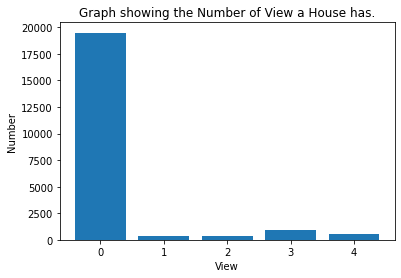

In [560]:
labels=df.view.unique()
plt.bar(labels , df['view'].value_counts())
plt.ylabel("Number")
plt.xlabel("View")
plt.title("Graph showing the Number of View a House has.")
plt.show()

In [561]:
df.view.value_counts()

0    19485
2      963
3      509
1      332
4      319
Name: view, dtype: int64

In [562]:
df.view.replace({2:1,
                 3:1,
                 4:1},inplace=True)

>* Majority of the Houses did not have a View 

The bedrooms variable

In [563]:
df.bedrooms.describe()

count   21608.00000
mean        3.37093
std         0.93010
min         0.00000
25%         3.00000
50%         3.00000
75%         4.00000
max        33.00000
Name: bedrooms, dtype: float64

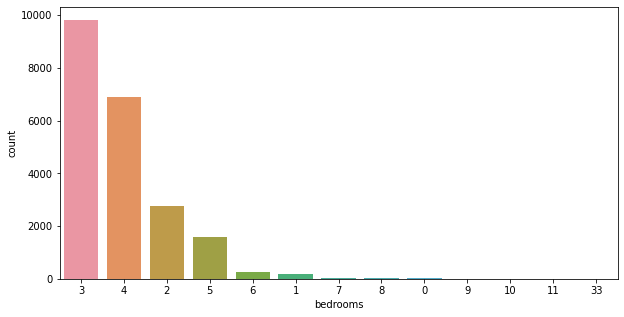

In [564]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(10,5))
sns.countplot(x=df.bedrooms, order = df['bedrooms'].value_counts().index)

>* Majority of the Houses had bedrooms ranging between two and five.
There was an extreme outlier with one house having 33 bedrooms

The Bathrooms Variable

In [565]:
df.bathrooms.describe()

count   21608.00000
mean        2.11474
std         0.77024
min         0.00000
25%         1.75000
50%         2.25000
75%         2.50000
max         8.00000
Name: bathrooms, dtype: float64

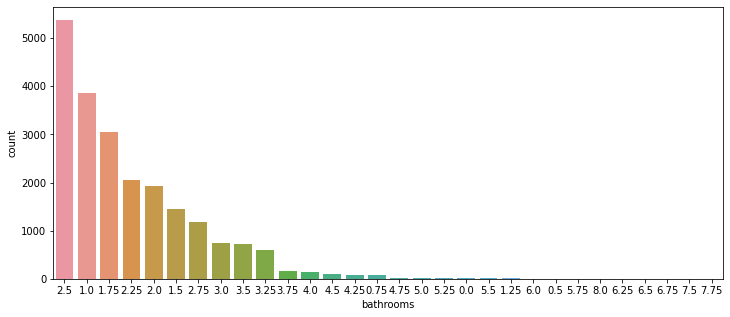

In [566]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(12,5))
sns.countplot(x=df.bathrooms, order = df['bathrooms'].value_counts().index)

The sqft living 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


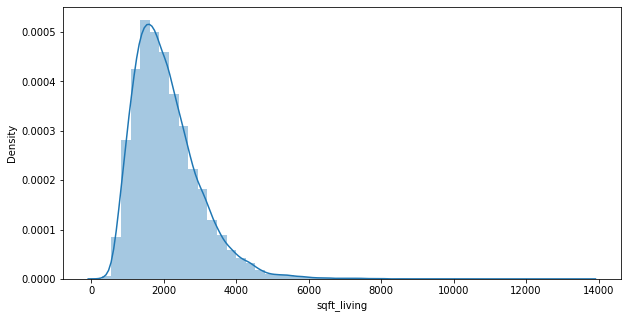

In [567]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(10,5))
sns.distplot(df['sqft_living'], hist=True, kde=True, rug=False, label='sqft_living', norm_hist=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


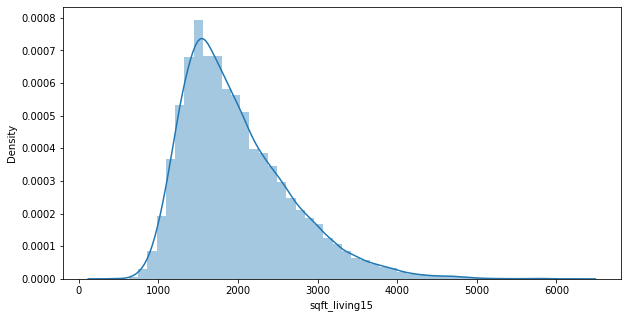

In [568]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(10,5))
sns.distplot(df['sqft_living15'], hist=True, kde=True, rug=False, label='sqft_living15', norm_hist=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


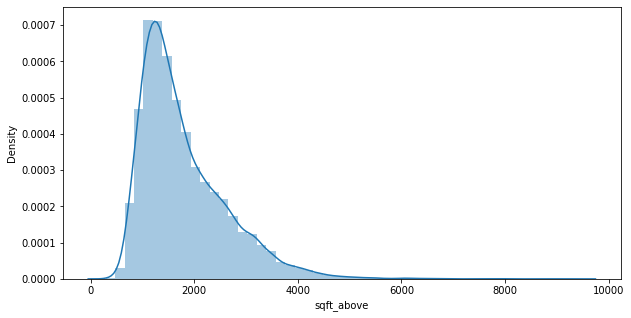

In [569]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(10,5))
sns.distplot(df['sqft_above'], hist=True, kde=True, rug=False, label='sqft_above', norm_hist=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


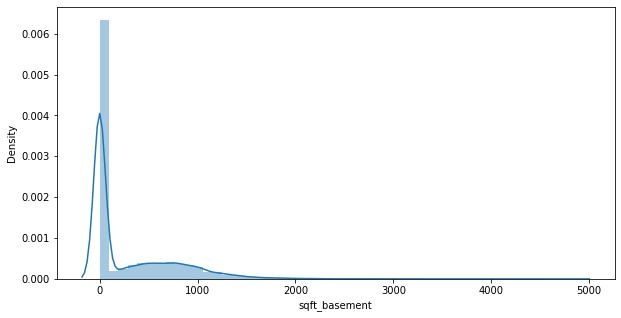

In [570]:
fig,axes = plt.subplots(nrows=1,ncols=1, figsize=(10,5))
sns.distplot(df['sqft_basement'], hist=True, kde=True, rug=False, label='sqft_basement', norm_hist=True)

### Bivariate Analysis

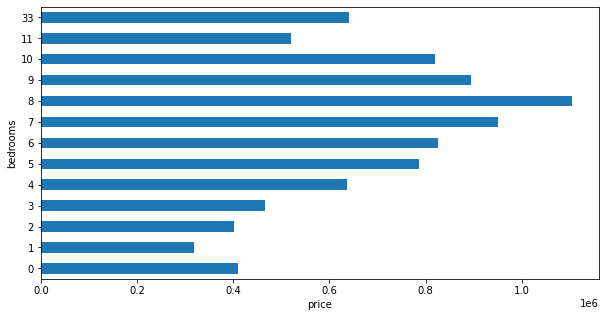

In [571]:
groups = df.groupby(['bedrooms'])['price'].mean()
plt.figure(figsize=(10, 5))
plt.xlabel('price')
groups.plot.barh()

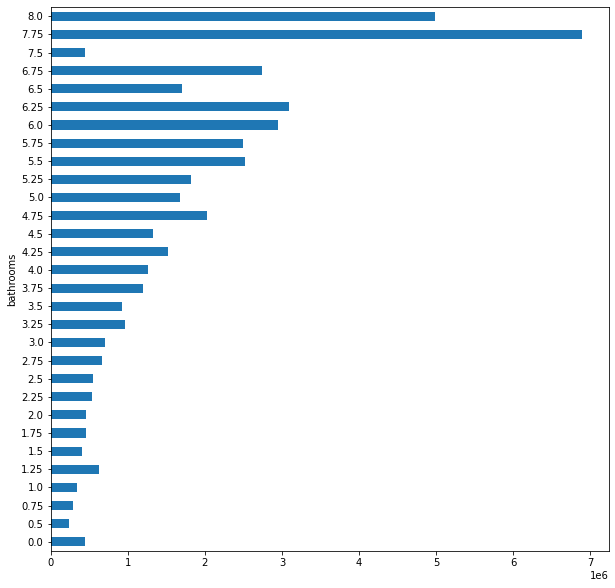

In [572]:
groups = df.groupby(['bathrooms'])['price'].mean()
plt.figure(figsize=(10, 10))
groups.plot.barh()

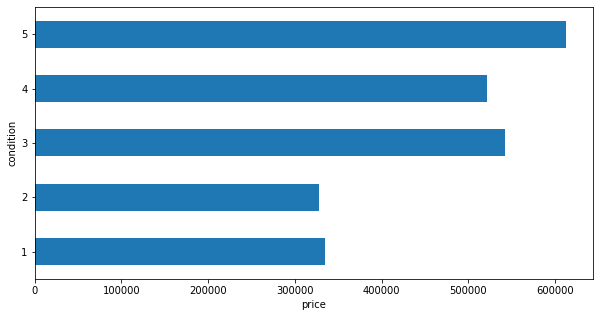

In [573]:
groups = df.groupby(['condition'])['price'].mean()
plt.figure(figsize=(10, 5))
plt.xlabel('price')
groups.plot.barh()

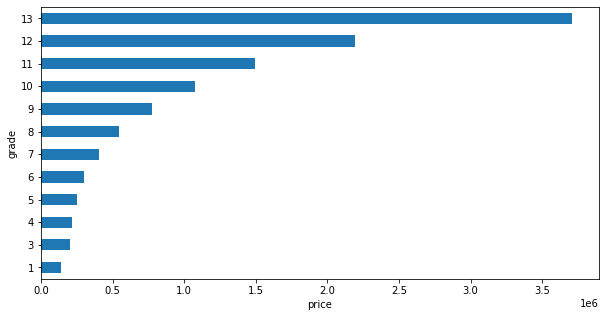

In [574]:
groups = df.groupby(['grade'])['price'].mean()
plt.figure(figsize=(10, 5))
plt.xlabel('price')
groups.plot.barh()

### Feature Engineering

In [575]:
df['house_size']= df['sqft_living']+df['sqft_above']+df['sqft_basement']

In [576]:
df['Years'] = 2020 - df['yr_built']

In [577]:
df.drop(['sqft_living','sqft_above','sqft_basement','yr_built','zipcode'],axis=1,inplace=True)

In [578]:
df.head()

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,lat,long,sqft_living15,sqft_lot15,house_size,Years
0,221900.00000,3,1.00000,5650,1.00000,0,3,7,47.51120,-122.25700,1340,5650,2360,65
1,538000.00000,3,2.25000,7242,2.00000,0,3,7,47.72100,-122.31900,1690,7639,5140,69
2,180000.00000,2,1.00000,10000,1.00000,0,3,6,47.73790,-122.23300,2720,8062,1540,87
3,604000.00000,4,3.00000,5000,1.00000,0,5,7,47.52080,-122.39300,1360,5000,3920,55
4,510000.00000,3,2.00000,8080,1.00000,0,3,8,47.61680,-122.04500,1800,7503,3360,33


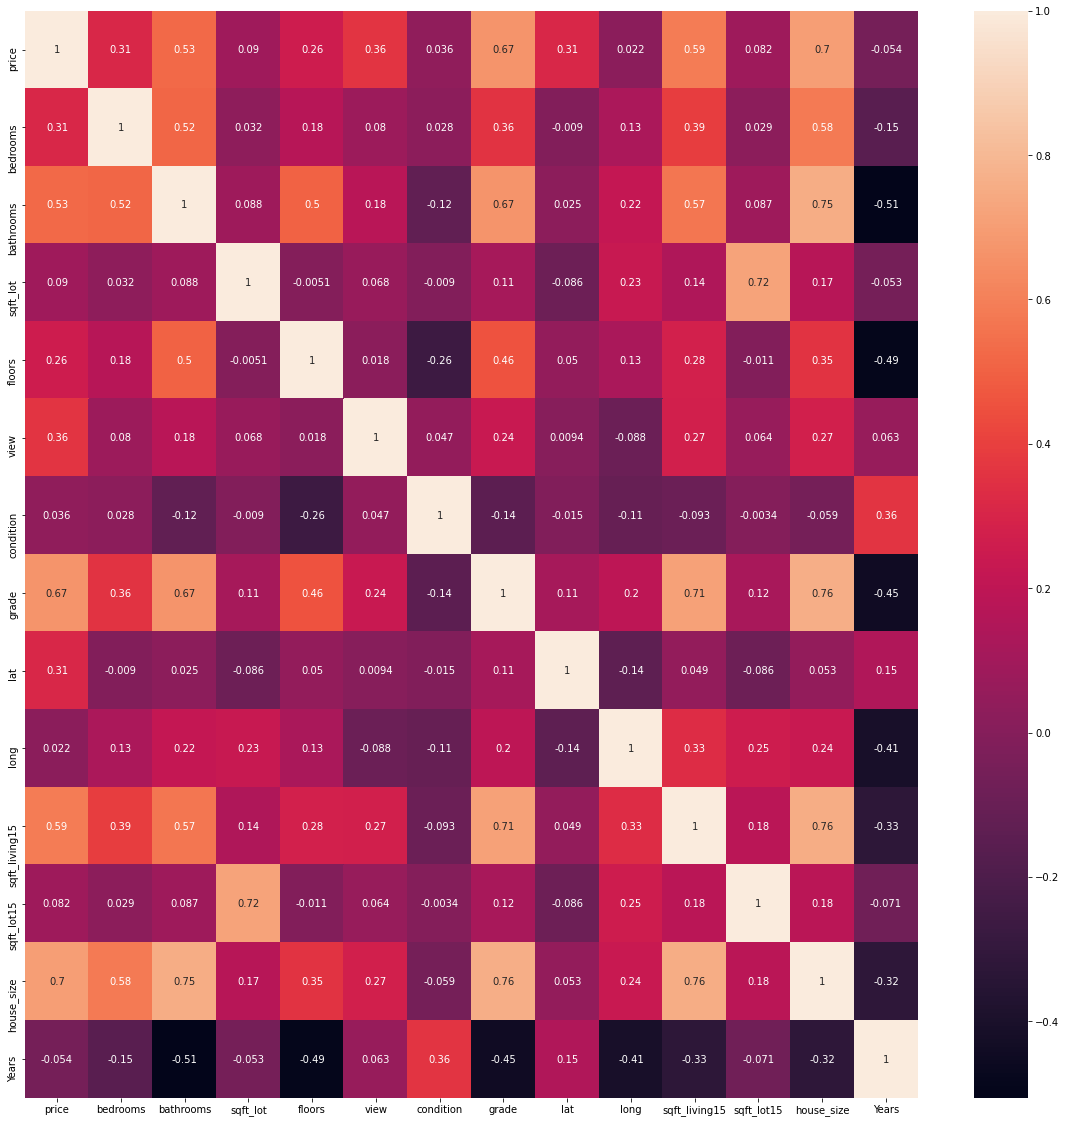

In [579]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

##  **3.Analysis**

### 3.1.Linear Regression Model.

>* The first model I implemented was the Multiple Linear Regression Model.
>* However this model has limitations.
>  * It is sensitive to outliers as they affect the regression line and the forecasted values.
>  * Multicollinearity in a LInear Regression Model increases the variance of the coefficients and makes the estimates senstive to minor changes.
>  * These models also have the assumption of homoskedasticity,constant variance.
>  * They are complex and fit the training data too well , hence overfitting .

>* Therefore in order for us to fit a Linear Regression Model we will first check for Multicolinearity using the VIF and then test for Homoskedasticity once we fit the model.


>* The first step would be to identify the feeatures and the target variable.
>* Then test for multicollinearity within the model and then drop the features with a high VIF score.

##### 3.1.1.Features

In [580]:
from sklearn import preprocessing
names = df.columns
d = preprocessing.normalize(df)
df1 = pd.DataFrame(d, columns=names)
df1.head()

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,lat,long,sqft_living15,sqft_lot15,house_size,Years
0,0.99928,0.00001,0.00000,0.02544,0.00000,0.00000,0.00001,0.00003,0.00021,-0.00055,0.00603,0.02544,0.01063,0.00029
1,0.99976,0.00001,0.00000,0.01346,0.00000,0.00000,0.00001,0.00001,0.00009,-0.00023,0.00314,0.01420,0.00955,0.00013
2,0.99731,0.00001,0.00001,0.05541,0.00001,0.00000,0.00002,0.00003,0.00026,-0.00068,0.01507,0.04467,0.00853,0.00048
3,0.99991,0.00001,0.00000,0.00828,0.00000,0.00000,0.00001,0.00001,0.00008,-0.00020,0.00225,0.00828,0.00649,0.00009
4,0.99974,0.00001,0.00000,0.01584,0.00000,0.00000,0.00001,0.00002,0.00009,-0.00024,0.00353,0.01471,0.00659,0.00006


In [641]:
#X = df1.drop(['price','long','lat','condition'],axis=1)
X = df1.drop(['price','long','lat','grade'],axis=1)
y = df1.price

In [642]:
correlations = X.corr()
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,lat,long,sqft_living15,sqft_lot15,house_size,Years
bedrooms,4.77881,-0.61529,0.04183,0.28808,0.11827,-0.49321,0.00154,4.24213,6.48522,0.33827,0.08341,-1.95706,-0.14101
bathrooms,-0.61529,4.12582,0.07234,-0.84419,-0.03257,-0.11670,-0.08173,12.08560,13.70215,-0.03001,0.09756,-1.49919,1.54067
sqft_lot,0.04183,0.07234,2.08810,0.06650,-0.01755,0.15273,0.21219,11.90038,12.27284,-0.01847,-1.48511,-0.11263,0.00108
floors,0.28808,-0.84419,0.06650,3.05101,0.05809,0.66415,-0.40644,-15.18191,-12.20754,0.22251,0.10905,-0.01905,0.96571
view,0.11827,-0.03257,-0.01755,0.05809,1.05395,0.03788,0.03778,20.69700,20.49380,-0.16150,-0.01646,-0.00348,-0.18325
condition,-0.49321,-0.11670,0.15273,0.66415,0.03788,6.98739,-0.20340,64.11014,70.31867,0.58724,-0.15903,0.05082,-0.63236
grade,0.00154,-0.08173,0.21219,-0.40644,0.03778,-0.20340,23.73712,83.30170,106.28261,-1.40926,0.22089,-1.82779,3.80325
lat,4.24213,12.08560,11.90038,-15.18191,20.69700,64.11014,83.30170,30287.84727,30450.08149,1.15838,-4.76901,50.51289,-7.44141
long,6.48522,13.70215,12.27284,-12.20754,20.49380,70.31867,106.28261,30450.08149,30651.70956,3.15398,-4.44080,47.18443,0.61208
sqft_living15,0.33827,-0.03001,-0.01847,0.22251,-0.16150,0.58724,-1.40926,1.15838,3.15398,4.10445,-0.21777,-1.67062,0.31361


##### 3.1.2.Fitting a Linear Model

In [643]:
#Split the data into train and test set
from sklearn.model_selection import train_test_split
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [644]:
# Scale the data 
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [617]:
# Fitting a Multiple Linear Regression Model
regression=LinearRegression()
regression = regression.fit(X_train,y_train)
y_pred = regression.predict(X_test)


In [618]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.004794470378121147
Mean Squared Error: 9.464332481421115e-05
Root Mean Squared Error: 0.009728480087568209


In [619]:
coef_dict_baseline = {}
for coef, feat in zip(regression.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'Years': 0.0004781616602303794,
 'bathrooms': -0.0010063609675142239,
 'bedrooms': -0.00032583557093912287,
 'condition': 0.0015095557154584291,
 'floors': -0.001911144493987656,
 'house_size': 0.0026740446729408224,
 'sqft_living15': 0.002795909149027528,
 'sqft_lot': -0.015447300795616412,
 'sqft_lot15': -0.009333200337272415,
 'view': -0.00023251179407173995}

In [620]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.8063886460270403

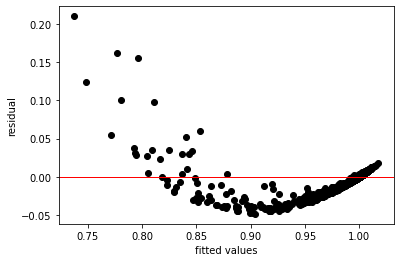

In [621]:
residuals =np.subtract(y_pred,y_test)
plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

In [622]:
#Checking for Multicollinearity
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residual)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(test_result,p_value)
print(critical_value)

2568.572020134078 0.0
inf


>* Testing for Heteroskedasticity of the model using the Barlett test, I noted that the p-value for the model was very low and the 

### 3.2.Quantile 

>* Quantile Regression works better with data that has Heteroskedasticity , outliers and high skewness.
>* The coefficients obtained from this model should differ significantly with those obtained when carrying out Multiple Linear Regression.

>* 1. Model 1 : The 0.25 Quantile , Median regression model

In [645]:
import statsmodels.formula.api as smf
mod = smf.quantreg('y ~ X', data= df1,)
res = mod.fit(q=0.25)
quantile = res.summary()
quantile

/usr/local/lib/python3.6/dist-packages/statsmodels/regression/quantile_regression.py:192: IterationLimitWarning: Maximum number of iterations (1000) reached.
  ") reached.", IterationLimitWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.4845
Model:                       QuantReg   Bandwidth:                   0.0003042
Method:                 Least Squares   Sparsity:                     0.004257
Date:                Thu, 03 Dec 2020   No. Observations:                21608
Time:                        11:36:31   Df Residuals:                    21594
                                        Df Model:                           13
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9992   4.62e-05   2.16e+04      0.000       0.999       0.999
X[0]         117.1335      7.474     15.673      0.000     102.484     131.783
X[1]        -215.5898     11.915    -18.094      0.000    -238.944    -192.235
X[2]          -0.2010      0.000   -420.256      0.000      -0.202      -0.200
X[3]        -822.8612     10.940    -75.214      0.000    -844.305    -801.417
X[4]          -5.4272     26.281     -0.207      0.836     -56.939      46.085
X[5]          90.3477      7.063     12.791      0.000      76.503     104.192
X[6]          62.2076      8.178      7.607      0.000      46.178      78.237
X[7]         136.4095     32.424      4.207      0.000      72.857     199.963
X[8]          43.9375     12.637      3.477      0.001      19.168      68.707
X[9]           0.3748      0.014     26.441      0.000       0.347       0.403
X[10]         -0.1116      0.001   -183.067      0.000      -0.113      -0.110
X[11]          0.1848      0.008     24.065      0.000       0.170       0.200
X[12]         -1.4952      0.275     -5.435      0.000      -2.035      -0.956
==============================================================================

The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>* 2. Model 2: The 50th Percentile model.

In [646]:
import statsmodels.formula.api as smf

mod = smf.quantreg('y ~ X', data= df1,)
res = mod.fit(q=0.5)

quantile = res.summary()
quantile

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.3174
Model:                       QuantReg   Bandwidth:                   0.0001274
Method:                 Least Squares   Sparsity:                     0.001711
Date:                Thu, 03 Dec 2020   No. Observations:                21608
Time:                        11:36:37   Df Residuals:                    21594
                                        Df Model:                           13
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.9999   2.18e-05   4.58e+04      0.000       1.000       1.000
X[0]          42.2659      3.226     13.100      0.000      35.942      48.590
X[1]         -79.8259      5.506    -14.497      0.000     -90.619     -69.033
X[2]          -0.0979      0.000   -670.643      0.000      -0.098      -0.098
X[3]        -331.8618      5.564    -59.640      0.000    -342.768    -320.955
X[4]           4.7647     11.804      0.404      0.686     -18.371      27.900
X[5]          51.1639      3.365     15.203      0.000      44.568      57.760
X[6]          51.1262      3.683     13.880      0.000      43.907      58.346
X[7]         170.2796     16.903     10.074      0.000     137.148     203.411
X[8]          64.0684      6.589      9.724      0.000      51.154      76.983
X[9]           0.1630      0.006     25.262      0.000       0.150       0.176
X[10]         -0.0487      0.000   -266.360      0.000      -0.049      -0.048
X[11]          0.0776      0.004     22.078      0.000       0.071       0.085
X[12]         -0.3924      0.116     -3.385      0.001      -0.620      -0.165
==============================================================================

The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>* 3. Model 3: The 75th Percentile Model.

In [647]:
import statsmodels.formula.api as smf

mod = smf.quantreg('y ~ X', data= df1,)
res = mod.fit(q=0.75)

quantile = res.summary()
quantile

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.2500
Model:                       QuantReg   Bandwidth:                   5.061e-05
Method:                 Least Squares   Sparsity:                     0.001028
Date:                Thu, 03 Dec 2020   No. Observations:                21608
Time:                        11:36:44   Df Residuals:                    21594
                                        Df Model:                           13
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0004   1.05e-05   9.55e+04      0.000       1.000       1.000
X[0]          13.7479      1.594      8.626      0.000      10.624      16.872
X[1]         -18.4989      2.751     -6.724      0.000     -23.892     -13.106
X[2]          -0.0517   4.61e-05  -1122.717      0.000      -0.052      -0.052
X[3]        -105.2294      2.893    -36.370      0.000    -110.900     -99.558
X[4]           4.8583      6.074      0.800      0.424      -7.048      16.764
X[5]          17.1499      1.684     10.182      0.000      13.849      20.451
X[6]          17.7364      1.781      9.960      0.000      14.246      21.227
X[7]         154.4644      9.155     16.872      0.000     136.520     172.409
X[8]          59.4295      3.568     16.654      0.000      52.435      66.424
X[9]           0.0647      0.003     20.654      0.000       0.059       0.071
X[10]         -0.0323    5.8e-05   -556.701      0.000      -0.032      -0.032
X[11]          0.0258      0.002     14.747      0.000       0.022       0.029
X[12]         -0.0956      0.055     -1.744      0.081      -0.203       0.012
==============================================================================

The condition number is large, 3.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>* The Quantile Regression models also appear to not be the best models for this Prediction.
>* The models have very low R-squared values.

### 3.3.Lasso Regression Model.

>* The Lasso Regression model also works well with Multicollinearity and is robust on Outliers.
>* I therefore did not eliminate the outliers of the Target Variable in my analysis.

>* The Lasso Regression Model penalizes less important features and acts as a shrinkage parameter and also does variable selection.
>* Fitting the model we have:

In [648]:
#Fitting the model
lasso =linear_model.Lasso(alpha=0.001) 
lasso = lasso.fit(X_train, y_train) 
y_pred = lasso.predict(X_test) 
print("lasso MSE:", mean_squared_error(y_test,y_pred)) 
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))


lasso MSE: 9.408042084940052e-05
Root Mean Squared Error: 0.009699506216782405


In [649]:
coef_dict_baseline = {}
for coef, feat in zip(lasso.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'Years': 0.00025386825283194714,
 'bathrooms': 0.0,
 'bedrooms': 0.0,
 'condition': 0.00023716049358548055,
 'floors': -0.0,
 'grade': 0.0,
 'house_size': 0.0009870694645332276,
 'lat': 0.0,
 'long': -0.0,
 'sqft_living15': 0.001607210389275035,
 'sqft_lot': -0.014724346957662685,
 'sqft_lot15': -0.008330637390839035,
 'view': -0.0}

In [650]:
from sklearn.metrics import r2_score
lasso = lasso.fit(X_train, y_train) 
y_pred = lasso.predict(X_test)
score = r2_score(y_test, y_pred)
score

0.8075401757202085

In [651]:
parameters = {'alpha': np.concatenate((np.arange(0.0001,0.1,0.1), np.arange(2, 5, 0.5), np.arange(5, 1000, 5)))}
lasso = linear_model.Lasso(normalize=True ,max_iter=1000000) 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2',cv=20) 
gridlasso.fit(X_train, y_train) 
 
print("lasso best parameters:", gridlasso.best_params_) 

lasso best parameters: {'alpha': 0.0001}


In [652]:

lasso = linear_model.Lasso(normalize=True,alpha =0.0001)
lasso.fit(X_train, y_train)
predicted = lasso.predict(X_test)
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': predicted})
df2.describe()

,Actual,Predicted
count,4322.00000,4322.00000
mean,0.99631,0.99601
std,0.02211,0.00809
min,0.52710,0.88950
25%,0.99901,0.99594
50%,0.99966,0.99797
75%,0.99988,0.99906
max,0.99999,1.00027


### 3.4.Ridge Regression Model



>* The Ridge Regression Model works well with Multicollinearity however it performs poorly in the presence of outliers therefore I removed the outliers from my Target Variable.

>* The Ridge regression model focuses on the features that contribute more to the overall error.
>* It still uses information from the less important features.
>* The Ridge regression model uses the l2 regularization applying a penalty to the sum of squared values.
>* Its limitation is that it cannot be used for feature selection.

In [653]:
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,10)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([1.00000000e-05, 5.99484250e-05, 3.59381366e-04, 2.15443469e-03,
       1.29154967e-02, 7.74263683e-02, 4.64158883e-01, 2.78255940e+00,
       1.66810054e+01, 1.00000000e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [654]:

search.best_params_

{'alpha': 1e-05}

In [658]:
ridge = Ridge(normalize=True,alpha=1e-05)
ridge = ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
print('Mean squared error',mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))



Mean squared error 9.435056861282427e-05
Root Mean Squared Error: 0.00971342208558983


In [659]:
coef_dict_baseline = {}
for coef, feat in zip(ridge.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'Years': 0.00010834552614857811,
 'bathrooms': -0.001243179115749933,
 'bedrooms': -0.000660951910942502,
 'condition': 0.0006384931223528269,
 'floors': -0.002472893408355719,
 'grade': 0.001999829996720745,
 'house_size': 0.0028409973142390103,
 'lat': 0.04192701384896066,
 'long': 0.041416310748458175,
 'sqft_living15': 0.0021817637601729595,
 'sqft_lot': -0.015432413854847902,
 'sqft_lot15': -0.009344794797419087,
 'view': -0.0001626088790480866}

In [660]:
from sklearn.metrics import r2_score
ridge = ridge.fit(X_train,y_train)
y_pred=ridge.predict(X_test)
score = r2_score(y_test, y_pred)
score

0.8069875358552006

>* After fitting the model and getting the RMSE was still high , the r2_score was 0.587 which was not to low however it could possibly be higher.
>* This model also does not give accurate predictions giving the minimum value as a very low figure.

### 3.5.ElasticNet Regression Model.

>* The ElasticNet model works well with Multicollinearity and is also robust in the presence of outliers.


##### 3.5.2.Fitting the Model.

>* The Elasticnet model uses both Li and L2 regularizations,it applies penalties to both the sum of the absolute values and to the sum of the squared values.

In [661]:
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=True,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [662]:
search.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.2}

In [663]:
elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.2)
elastic = elastic.fit(X_train,y_train)
y_pred = elastic.predict(X_test)
print('Mean Squared Error :' ,mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Squared Error : 9.474124666127609e-05
Root Mean Squared Error: 0.009733511527772291


In [664]:
coef_dict_baseline = {}
for coef, feat in zip(elastic.coef_,X.columns):
    coef_dict_baseline[feat] = coef
coef_dict_baseline

{'Years': 0.00044910050564447943,
 'bathrooms': -0.0,
 'bedrooms': 0.0,
 'condition': 0.00042947947186311886,
 'floors': -0.0008114647551310293,
 'grade': 0.0006697580883779589,
 'house_size': 0.0013779626968903826,
 'lat': 8.130663921827293e-05,
 'long': -6.793300025162839e-05,
 'sqft_living15': 0.0014041871496891574,
 'sqft_lot': -0.013250711555592256,
 'sqft_lot15': -0.00903370146918332,
 'view': -0.0}

In [665]:
from sklearn.metrics import r2_score
y_pred=elastic.predict(X_test)
score = r2_score(y_test, y_pred)
score

0.806188327817267